## Load File

In [3]:
import pandas as pd
data = pd.read_csv('exp1_a.csv')

# drop first two, irrelevant, columns
data.drop(data.columns[0:2],axis=1,inplace=True)

In [ ]:
# choose rows at random for checking
data.sample(5)

## Missing Values

In [ ]:
# how many missing values for the different columns?
data_na=data.isnull().sum()

In [ ]:
# remove all the rows that contain a missing value
data_na=data.dropna()

In [ ]:
# remove all columns with at least one missing value
data_na=data.dropna(axis=1)

In [ ]:
# replace all NA's with 0
data_na=data.fillna(0)

In [ ]:
# imputer fills na's (default: mean)
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
data_na=my_imputer.fit_transform(data)

## Initial plots & data summary

In [ ]:
data.describe()
#also: data.corr()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f268fc8acc0>,
      dtype=object)

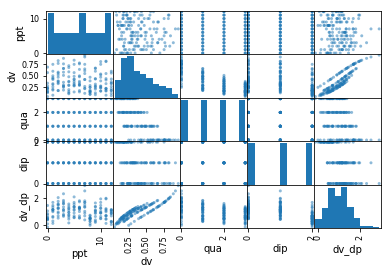

In [22]:
%matplotlib inline
#data.boxplot()
#data.hist()
from pandas.plotting import scatter_matrix
scatter_matrix(data)

In [23]:
# get frequencies in categorical vars
data['qua'].value_counts()

3    39
2    39
1    39
0    39
Name: qua, dtype: int64

## Regular Expressions

In [4]:
import re
text='Any text!'
# some substitutions
re.sub(r'\n.* PLACEHOLDER*\n', ' ', text) # replace a line that includes the word PLACEHOLDER with a space
re.sub(r'[A-Z]{2,}', ' ', text) # remove any sequence of capital letters larger than 1
re.sub(r'\n\d+\s.*\n', ' ', text) # remove digits and space at the start of a line
re.sub('\[(.*?)\]', '', text) # remove text within and including square brackets
re.sub('[^A-Z]','',text) # delete all except capital letters

# misc
pd.Series(['test','abcde!','test12 :;;']).str.count(r'\W') # count number of non word characters per entry

0    0
1    1
2    4
dtype: int64

In [2]:
re.sub('[^A-Z]','','Test')

'T'

## Prep for training

In [12]:
# train test split
from sklearn.model_selection import train_test_split
from random import randint
y= [randint(0,1) for b in range(0,data.shape[0])] #data['dv'] for continuous
X=data #data.drop('dv',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # stratify=y for balanced data


In [34]:
# categorical variables should be dummy coded for certain analyses
pd.get_dummies(data['qua']).head()

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0


## Gridsearch

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# note: won't run on this example because I have a continuous y, just an example
tuned_parameters = [{'C': [0.01,0.1,1, 10, 100, 1000]}]
clf = GridSearchCV(LogisticRegression(class_weight='balanced'), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print('Accuracy',accuracy_score(y_true, y_pred))

{'C': 10}
             precision    recall  f1-score   support

          0       0.69      0.33      0.45        27
          1       0.05      0.20      0.08         5

avg / total       0.59      0.31      0.39        32

Accuracy 0.3125


## Dummy Classifier

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
y_true, y_pred = y_test, dummy_classifier.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.84      1.00      0.92        27
          1       0.00      0.00      0.00         5

avg / total       0.71      0.84      0.77        32



/usr/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Basic statistical tests